In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [19]:
music = pd.DataFrame()

music['duration'] = np.random.randint(100, 400, 30)
music['loudness'] = np.random.randint(10, 45,30)
music['bpm'] = np.random.randint(50, 110, 30)
music['danceability'] = [random.uniform(0, 1) for i in range(30)]

In [20]:
music.head()

,duration,loudness,bpm,danceability
0,207,33,85,0.265784
1,139,39,71,0.951563
2,304,24,103,0.709257
3,120,20,92,0.846532
4,149,38,87,0.142549


Text(0.5, 1.0, 'K =10, Unweighted')

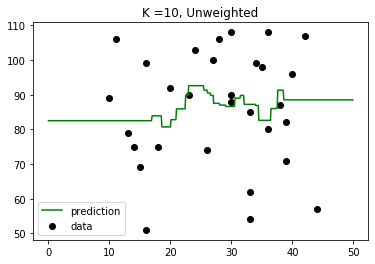

In [21]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors = 10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

#Set our prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis]
Y_ = knn.predict(T)
plt.scatter(X, Y, c = 'k', label = 'data')
plt.plot(T, Y_, c = 'g', label = 'prediction')
plt.legend()
plt.title('K =10, Unweighted')

Text(0.5, 1.0, 'K =10, Weighted')

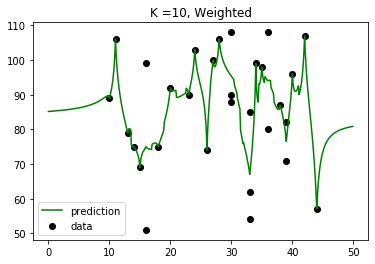

In [26]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors= 5, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

#Set our prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis]
Y_ = knn_w.predict(T)
plt.scatter(X, Y, c = 'k', label = 'data')
plt.plot(T, Y_, c = 'g', label = 'prediction')
plt.legend()
plt.title('K =10, Weighted')

In [27]:
# Validating KNN
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv = 5)
print("UnWeighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std()*2))
score_w = cross_val_score(knn_w, X, Y, cv = 5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std()*2))

UnWeighted Accuracy: -0.68 (+/- 1.42)
Weighted Accuracy: -0.92 (+/- 0.85)
